In [3]:
import os
join = os.path.join
import numpy as np
import SimpleITK as sitk
from skimage import io

## CT image preprocessing

In [8]:
def adjust_CT_win_level_width(image, win_level=40.0, win_width=400.0):
    # adjust window level and window width for CT images
    lower_bound, upper_bound = win_level - win_width/2, win_level + win_width/2
    image_data_pre = np.clip(image_data, lower_bound, upper_bound)
    image_data_pre = (image_data_pre - np.min(image_data_pre))/(np.max(image_data_pre)-np.min(image_data_pre))*255.0
    image_data_pre = np.uint8(image_data_pre)
    return image_data_pre


In [9]:
img_path = "HCC_004_0000.nii.gz"
img_sitk = sitk.ReadImage(img_path)
image_data = sitk.GetArrayFromImage(img_sitk)
pre_img = adjust_CT_win_level_width(image_data, win_level=40.0, win_width=400.0)

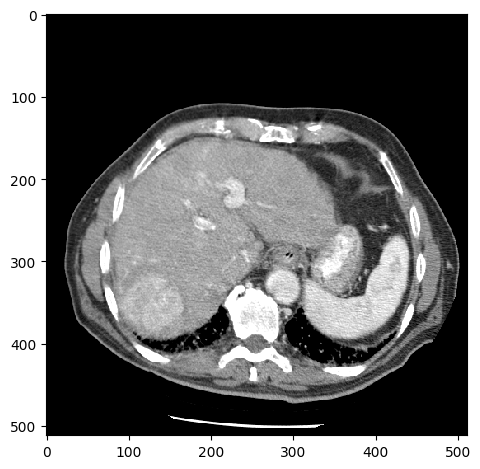

In [10]:
io.imshow(pre_img[50, :, :])

## MR image preprocessing

In [16]:
def auto_pre(image_data, lower_percent=0.5, upper_percent=99.5):
    lower_bound, upper_bound = np.percentile(image_data[image_data > 0], lower_percent), np.percentile(image_data[image_data > 0], upper_percent)
    image_data_pre = np.clip(image_data, lower_bound, upper_bound)
    image_data_pre = (image_data_pre - np.min(image_data_pre))/(np.max(image_data_pre)-np.min(image_data_pre))*255.0
    image_data_pre = np.uint8(image_data_pre)
    return image_data_pre

In [17]:
img_path = "MRDelayPhase_6_0000.nii.gz"
img_sitk = sitk.ReadImage(img_path)
image_data = sitk.GetArrayFromImage(img_sitk)
pre_img = auto_pre(image_data)

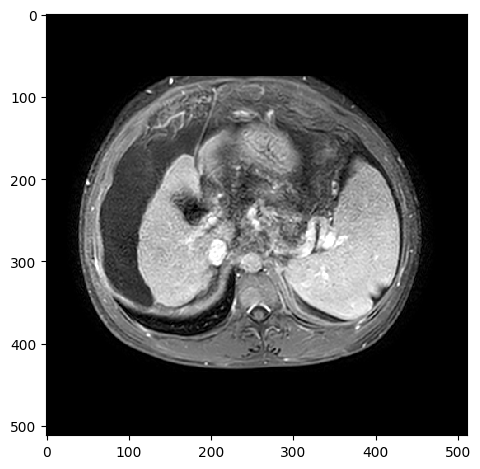

In [19]:
io.imshow(pre_img[40])

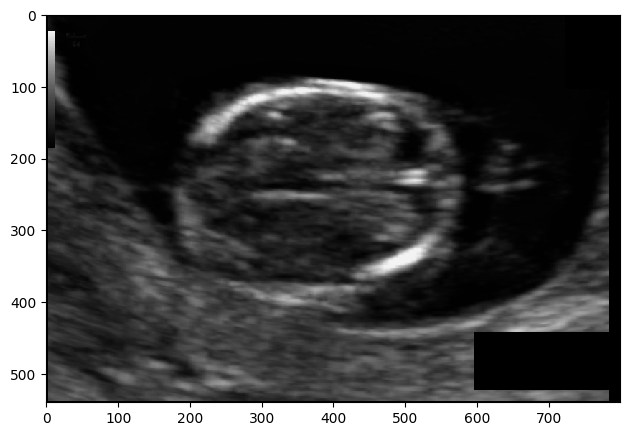

In [22]:
img2d = io.imread('018_HC.png')
io.imshow(img2d)

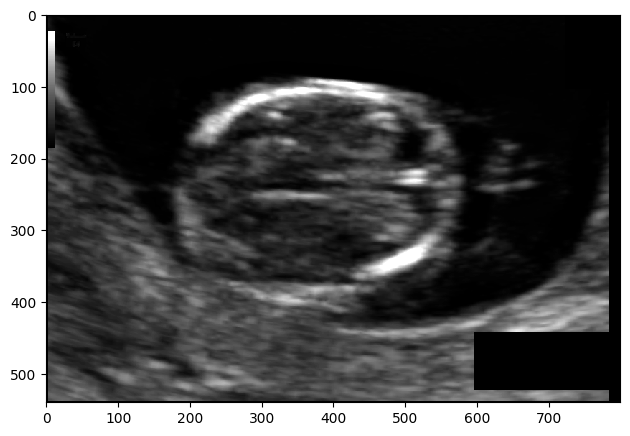

In [23]:
img2d_pre = auto_pre(img2d)
io.imshow(img2d_pre)